In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
pd.set_option('display.max_colwidth', -1)

# Analysis

## Scope:
1. Main Categories
2. Backers
3. Goal 


In [5]:
#read data
dfraw = pd.read_csv('data_analysis.csv', index_col=0, encoding='utf-8-sig')

In [6]:
#There are projects undefined where  backers=0 but pledged > goal. We are going to drop them.
x = (dfraw['backers'] == 0 ) & (dfraw['successful'] == 1)
dfraw = dfraw.drop(dfraw[x].index)

In [7]:
# create a copy and drop no related columns
df = dfraw.drop(['name', 'category', 'currency', 'deadline', 'goal', 'launched', 'pledged', 'state', 'country', 'date_diff',
       'rtdate', 'rate', 'pledged_usd'], axis=1)
df.head()

,main_category,backers,successful,goal_usd
0,Publishing,0,0,1527.485876
1,Film & Video,15,0,30000.000000
2,Film & Video,3,0,45000.000000
3,Music,1,0,5000.000000
4,Film & Video,14,0,19500.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 376894 entries, 0 to 378653
Data columns (total 4 columns):
main_category    376894 non-null object
backers          376894 non-null int64
successful       376894 non-null int64
goal_usd         373785 non-null float64
dtypes: float64(1), int64(2), object(1)
memory usage: 14.4+ MB


In [7]:
#there are 3117 null values in goal_usd --> we are going to drop them for the goal analysis
print(df[df.goal_usd.isnull()].count())

main_category    3109
backers          3109
successful       3109
goal_usd         0   
dtype: int64


In [47]:
describe = df.describe()
describe


,backers,successful,goal_usd
count,376894.000000,376894.000000,3.737850e+05
mean,106.112644,0.358939,4.677203e+04
std,909.280248,0.479690,1.182659e+06
min,0.000000,0.000000,1.000000e-02
25%,2.000000,0.000000,2.000000e+03
50%,12.000000,0.000000,5.500000e+03
75%,56.000000,1.000000,1.600000e+04
max,219382.000000,1.000000,1.529369e+08


C:\Users\Jimena\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


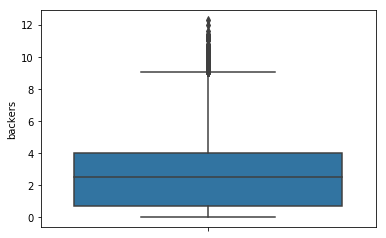

In [40]:
sns.boxplot( y=np.log(df.backers))


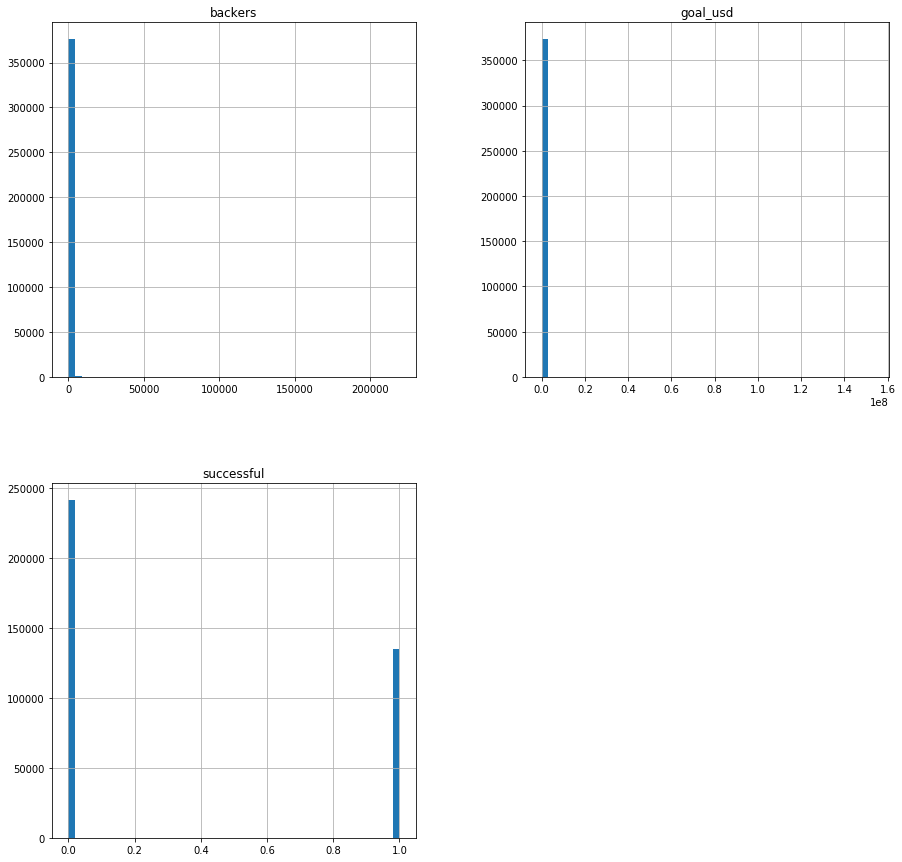

In [13]:
#plot histogram
df.hist(bins=50, figsize=(15,15));
plt.savefig('histogram.png')

The histograms are tail heavy: they extend much farther to the right of the median than to the left.

## Main Categories

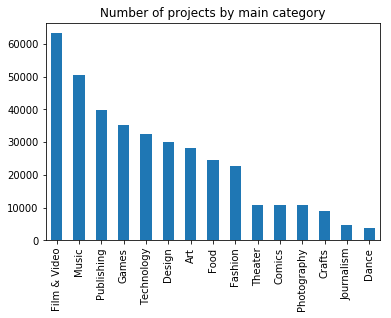

In [10]:
categories = df['main_category'].value_counts()
categories.plot.bar(title='Number of projects by main category');
plt.savefig('categories.png')

In [11]:
ratesuccess = df[['main_category', 'successful']].groupby(by='main_category').mean().sort_values(
    by='successful', ascending=False)
ratesuccess

,successful
main_category,
Dance,0.621019
Theater,0.600348
Comics,0.543026
Music,0.478417
Art,0.412084
Film & Video,0.374862
Games,0.361776
Design,0.361481
Publishing,0.310385


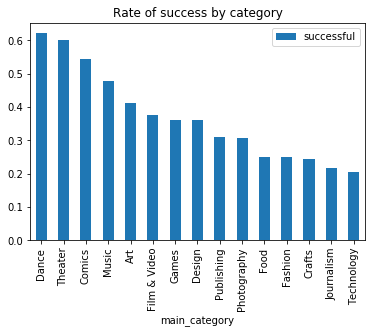

In [12]:
ratesuccess.plot.bar(title='Rate of success by category');
plt.savefig('ratesuccess.png')

## Backers

In [29]:
databackers = df[['backers', 'successful']]

In [35]:
databackers.backers.describe()

count    376894.000000
mean     106.112644   
std      909.280248   
min      0.000000     
25%      2.000000     
50%      12.000000    
75%      56.000000    
max      219382.000000
Name: backers, dtype: float64

In [41]:
# discretized
nb = df.backers
bins = [0, 1, 30, 100, 10000, 300000]
group_names = ['zero','low', 'media','high', 'huge']
cats = pd.cut(nb, bins, labels=group_names)
pd.value_counts(cats)

low      154451
media    73783 
high     59698 
zero     34869 
huge     251   
Name: backers, dtype: int64

In [42]:
df['backers_disc'] = cats
backers_rate = df[['backers_disc', 'successful']].groupby('backers_disc').mean()
backers_rate['n_proj'] = df[['backers_disc', 'successful']].groupby('backers_disc').count()
backers_rate

,successful,n_proj
backers_disc,,
zero,0.011558,34869
low,0.199746,154451
media,0.699023,73783
high,0.874418,59698
huge,1.000000,251


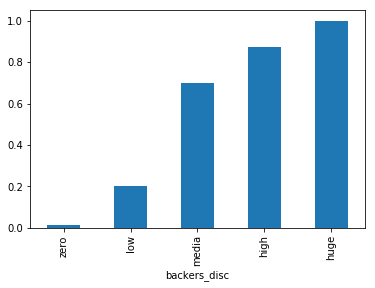

In [45]:
backers_rate['successful'].plot.bar(),
plt.savefig('backersrate.png')

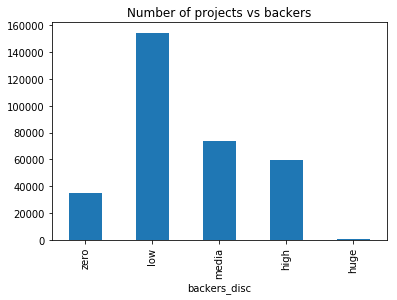

In [46]:
backers_rate['n_proj'].plot.bar(title='Number of projects vs backers')
plt.savefig('backersnproj.png')

In [19]:
backers = databackers.pivot_table(index = 'backers', columns='successful',aggfunc=np.size)
backers = backers.rename(columns= {1: 'Successful', 0:'Failed'})
backers.head()

successful,Failed,Successful
backers,,
0,107684.0,NaN
1,68932.0,806.0
2,45624.0,768.0
3,31186.0,940.0
4,23124.0,1012.0


In [121]:
# What is the number of backers that most success projects have?
backers[backers['Successful'] == backers['Successful'].max()]

successful,Failed,Successful
backers,,
19,3582.0,2714.0


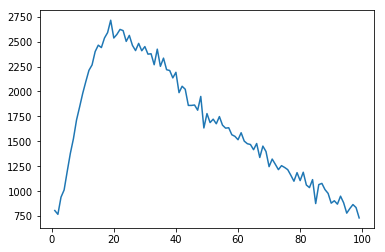

In [152]:
# Successful has a max in 19 backers
plt.plot(backers['Successful'][:100]),
plt.savefig('backersvssucc')


## Goal

In [8]:
datagoal = df.copy()

In [10]:
datagoal.goal_usd.describe()

count    3.737850e+05
mean     4.677203e+04
std      1.182659e+06
min      1.000000e-02
25%      2.000000e+03
50%      5.500000e+03
75%      1.600000e+04
max      1.529369e+08
Name: goal_usd, dtype: float64

In [44]:
datagoal = datagoal.dropna(axis=0)

In [20]:
ng = datagoal.goal_usd
bins = [0, 2000, 10000, 100000, 1000000, 1.6e+08]
group_names = ['2K', '10K','100K','1M' ,'10B']
cats = pd.cut(ng, bins, labels=group_names)
pd.value_counts(cats)

10K     152666
100K    111681
2K      96475 
1M      11872 
10B     1091  
Name: goal_usd, dtype: int64

In [21]:
datagoal['goal_bins'] = cats
goal_rate = datagoal[['goal_bins', 'successful']].groupby('goal_bins').mean()
goal_rate['n_proj'] = datagoal[['goal_bins', 'successful']].groupby('goal_bins').count()
goal_rate

,successful,n_proj
goal_bins,,
2K,0.484789,96475
10K,0.383582,152666
100K,0.251350,111681
1M,0.064522,11872
10B,0.010082,1091


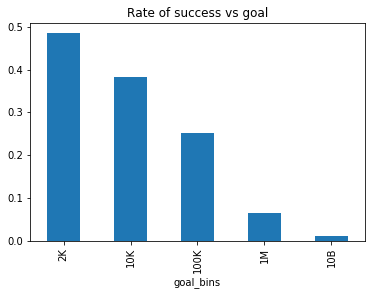

In [24]:
goal_rate['successful'].plot.bar(title='Rate of success vs goal');
plt.savefig('goal_success.png')

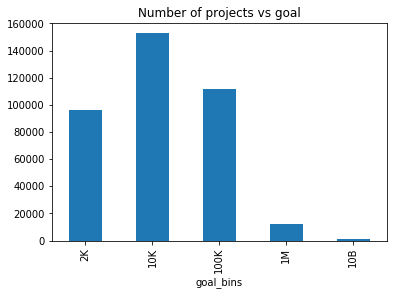

In [25]:
goal_rate['n_proj'].plot.bar(title='Number of projects vs goal'),
plt.savefig('goal_nproj.png')